# Boston Housing Prices Dataset

This is a very popular dataset that has been in many machine learning papers. The data consists of 506 homes and 13 features of the housing market in Boston.  You can find more details about this dataset here: https://archive.ics.uci.edu/ml/datasets/Housing. 
<br><br>
***Problem:*** Determine which features impact the Boston Housing Prices and why.
<br><br><br>
***Data***

In [1]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_boston
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

from matplotlib import pyplot as plt
%matplotlib inline

import statsmodels.formula.api as smf 

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

import sklearn

bs = sklearn.datasets.load_boston()
print(bs.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

***Data Analysis***
<br><br>
Number of houses: 506<br>
Number of features: 13

In [2]:
print(bs.data.shape)

(506, 13)


In [3]:
bs.data

array([[  6.32000000e-03,   1.80000000e+01,   2.31000000e+00, ...,
          1.53000000e+01,   3.96900000e+02,   4.98000000e+00],
       [  2.73100000e-02,   0.00000000e+00,   7.07000000e+00, ...,
          1.78000000e+01,   3.96900000e+02,   9.14000000e+00],
       [  2.72900000e-02,   0.00000000e+00,   7.07000000e+00, ...,
          1.78000000e+01,   3.92830000e+02,   4.03000000e+00],
       ..., 
       [  6.07600000e-02,   0.00000000e+00,   1.19300000e+01, ...,
          2.10000000e+01,   3.96900000e+02,   5.64000000e+00],
       [  1.09590000e-01,   0.00000000e+00,   1.19300000e+01, ...,
          2.10000000e+01,   3.93450000e+02,   6.48000000e+00],
       [  4.74100000e-02,   0.00000000e+00,   1.19300000e+01, ...,
          2.10000000e+01,   3.96900000e+02,   7.88000000e+00]])

In [4]:
print(type(bs.data))
print(bs.keys())
print(bs.feature_names)

<class 'numpy.ndarray'>
dict_keys(['DESCR', 'data', 'feature_names', 'target'])
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [5]:
print(bs.target)
#These are the housing prices

[ 24.   21.6  34.7  33.4  36.2  28.7  22.9  27.1  16.5  18.9  15.   18.9
  21.7  20.4  18.2  19.9  23.1  17.5  20.2  18.2  13.6  19.6  15.2  14.5
  15.6  13.9  16.6  14.8  18.4  21.   12.7  14.5  13.2  13.1  13.5  18.9
  20.   21.   24.7  30.8  34.9  26.6  25.3  24.7  21.2  19.3  20.   16.6
  14.4  19.4  19.7  20.5  25.   23.4  18.9  35.4  24.7  31.6  23.3  19.6
  18.7  16.   22.2  25.   33.   23.5  19.4  22.   17.4  20.9  24.2  21.7
  22.8  23.4  24.1  21.4  20.   20.8  21.2  20.3  28.   23.9  24.8  22.9
  23.9  26.6  22.5  22.2  23.6  28.7  22.6  22.   22.9  25.   20.6  28.4
  21.4  38.7  43.8  33.2  27.5  26.5  18.6  19.3  20.1  19.5  19.5  20.4
  19.8  19.4  21.7  22.8  18.8  18.7  18.5  18.3  21.2  19.2  20.4  19.3
  22.   20.3  20.5  17.3  18.8  21.4  15.7  16.2  18.   14.3  19.2  19.6
  23.   18.4  15.6  18.1  17.4  17.1  13.3  17.8  14.   14.4  13.4  15.6
  11.8  13.8  15.6  14.6  17.8  15.4  21.5  19.6  15.3  19.4  17.   15.6
  13.1  41.3  24.3  23.3  27.   50.   50.   50.   2

Putting dataframe together: data with column names

In [6]:
bos = pd.DataFrame(bs.data, columns=bs.feature_names)
bos[0:10]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10


Adding ***Price*** to dataframe

In [7]:
bos['PRICE'] = bs.target

In [8]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Describe the data

In [9]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [10]:
bos.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.199458,0.404471,-0.055295,0.417521,-0.219940,0.350784,-0.377904,0.622029,0.579564,0.288250,-0.377365,0.452220,-0.385832
ZN,-0.199458,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.404471,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055295,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.417521,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219940,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.350784,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.377904,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.622029,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.579564,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<br><br>***Data Visualization***

***CRIM:*** per capita crime rate by town

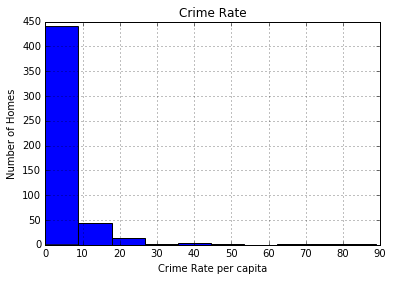

In [11]:
bos['CRIM'].hist()

plt.title("Crime Rate")

plt.xlabel("Crime Rate per capita")
plt.ylabel("Number of Homes")

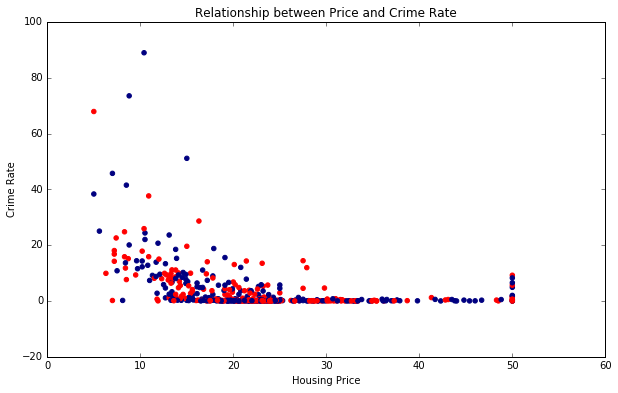

In [12]:
plt.figure(figsize=(10,6))
plt.scatter(bos.PRICE, bos.CRIM, color=['navy', 'red'], s=20)
plt.xlabel("Housing Price")
plt.ylabel("Crime Rate")
plt.title("Relationship between Price and Crime Rate")

Not uncommon to see higher crime rates in the areas with lower home values.
<br><br>

***ZN:*** Proportion of residential land zoned for lots over 25,000 sq.ft.

In [13]:
bos['ZN'].value_counts().head()

0.0     372
20.0     21
80.0     15
12.5     10
22.0     10
Name: ZN, dtype: int64

In [14]:
bos['ZN'].value_counts(normalize=True).head()

0.0     0.735178
20.0    0.041502
80.0    0.029644
12.5    0.019763
22.0    0.019763
Name: ZN, dtype: float64

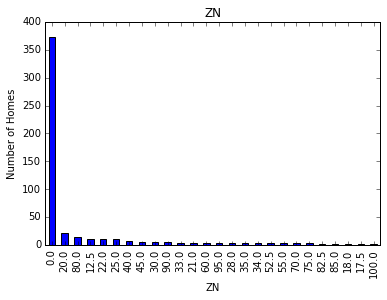

In [15]:
bos['ZN'].value_counts().plot(kind='bar')

plt.title("ZN")

plt.xlabel("ZN")
plt.ylabel("Number of Homes")

***INDUS:*** proportion of non-retail business acres per town

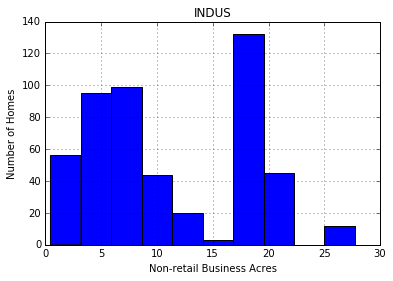

In [16]:
bos['INDUS'].hist()

plt.title("INDUS")

plt.xlabel("Non-retail Business Acres")
plt.ylabel("Number of Homes")

***CHAS:*** Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) 

In [17]:
bos['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [18]:
bos['CHAS'].value_counts(normalize=True)

0    0.93083
1    0.06917
Name: CHAS, dtype: float64

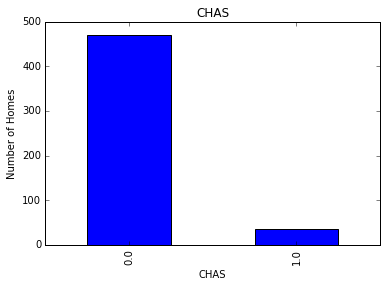

In [19]:
bos['CHAS'].value_counts().plot(kind='bar')

plt.title("CHAS")

plt.xlabel("CHAS")
plt.ylabel("Number of Homes")

In [20]:
bos[['PRICE', 'CHAS']].corr()

,PRICE,CHAS
PRICE,1.00000,0.17526
CHAS,0.17526,1.00000


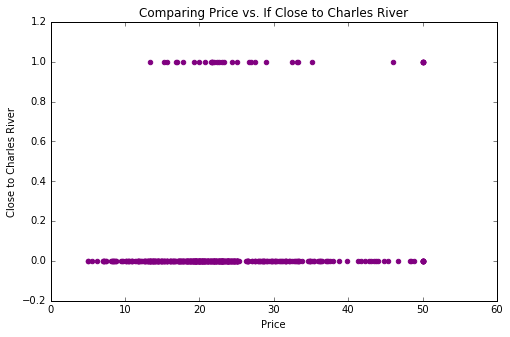

In [21]:
plt.figure(figsize=(8,5))
plt.scatter(bos.PRICE, bos.CHAS, color=['purple'], s=20)

plt.xlabel("Price")
plt.ylabel("Close to Charles River")
plt.title("Comparing Price vs. If Close to Charles River")

Prices may increase when home is closer to the river
<br><br>

***NOX:*** nitric oxides concentration (parts per 10 million)

In [22]:
bos['NOX'].value_counts().head()

0.538    23
0.713    18
0.437    17
0.871    16
0.624    15
Name: NOX, dtype: int64

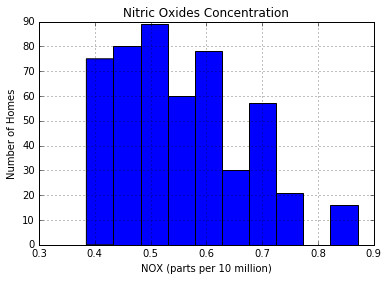

In [23]:
bos['NOX'].hist()

plt.title("Nitric Oxides Concentration")

plt.xlabel("NOX (parts per 10 million)")
plt.ylabel("Number of Homes")

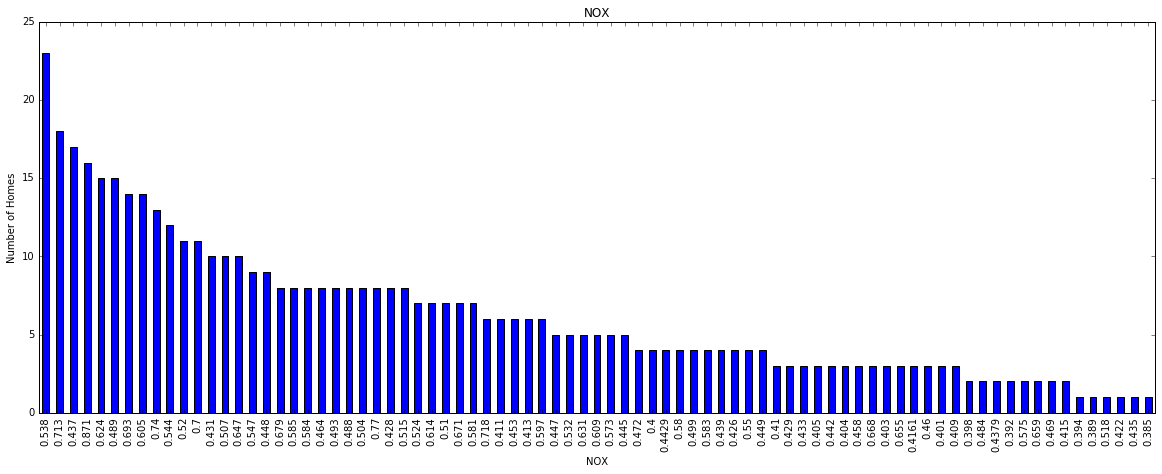

In [24]:
bos['NOX'].value_counts().plot(kind='bar', figsize=(20,7))

plt.title("NOX")

plt.xlabel("NOX")
plt.ylabel("Number of Homes")

In [25]:
bos[['PRICE', 'NOX']].corr()

,PRICE,NOX
PRICE,1.000000,-0.427321
NOX,-0.427321,1.000000


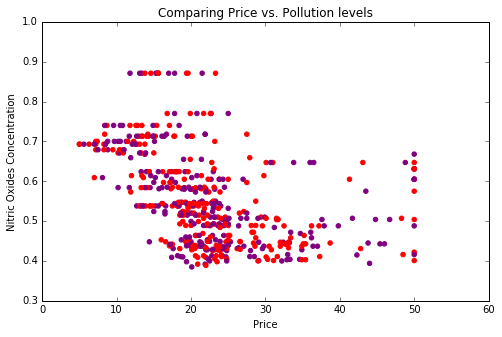

In [26]:
plt.figure(figsize=(8,5))
plt.scatter(bos.PRICE, bos.NOX, color=['purple', 'red'], s=20)

plt.xlabel("Price")
plt.ylabel("Nitric Oxides Concentration")
plt.title("Comparing Price vs. Pollution levels")

Negative Correlation. As the price increases, there is slightly less pollution in the area.
<br><br>

***RM:*** average number of rooms per dwelling

In [27]:
bos['RM'].value_counts().head()

6.417    3
5.713    3
6.405    3
6.167    3
6.229    3
Name: RM, dtype: int64

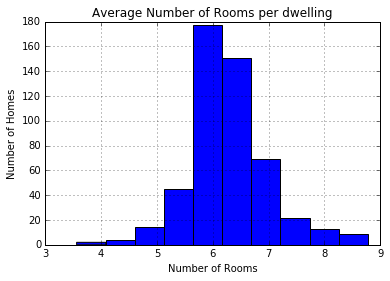

In [28]:
bos['RM'].hist()

plt.title("Average Number of Rooms per dwelling")

plt.xlabel("Number of Rooms")
plt.ylabel("Number of Homes")

In [29]:
bos[['PRICE', 'RM']].corr()

,PRICE,RM
PRICE,1.00000,0.69536
RM,0.69536,1.00000


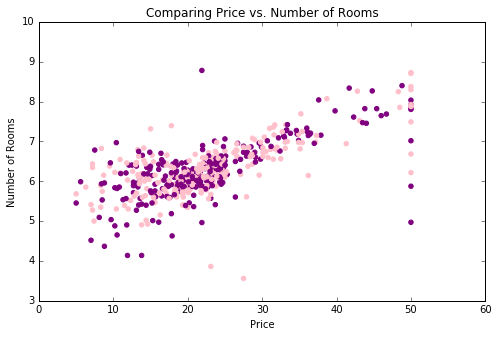

In [30]:
plt.figure(figsize=(8,5))
plt.scatter(bos.PRICE, bos.RM, color=['purple', 'pink'], s=20)

plt.xlabel("Price")
plt.ylabel("Number of Rooms")
plt.title("Comparing Price vs. Number of Rooms")

Positive Correlation. Obviously as the number of rooms increase, the price increases.
<br><br>

***Age:*** proportion of owner-occupied units built prior to 1940

In [31]:
bos['AGE'].value_counts(normalize=True).head()

100.0    0.084980
96.0     0.007905
98.8     0.007905
95.4     0.007905
97.9     0.007905
Name: AGE, dtype: float64

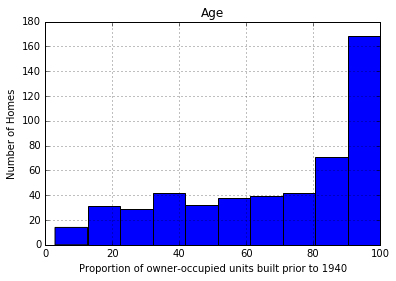

In [32]:
bos['AGE'].hist()

plt.title("Age")

plt.xlabel("Proportion of owner-occupied units built prior to 1940")
plt.ylabel("Number of Homes")

***DIS:*** weighted distances to five Boston employment centres

In [33]:
bos['DIS'].value_counts().head()

3.4952    5
5.4007    4
6.8147    4
5.7209    4
5.2873    4
Name: DIS, dtype: int64

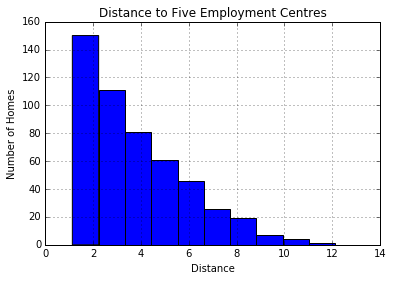

In [34]:
bos['DIS'].hist()

plt.title("Distance to Five Employment Centres")

plt.xlabel("Distance")
plt.ylabel("Number of Homes")

In [35]:
bos[['PRICE', 'DIS']].corr()

,PRICE,DIS
PRICE,1.000000,0.249929
DIS,0.249929,1.000000


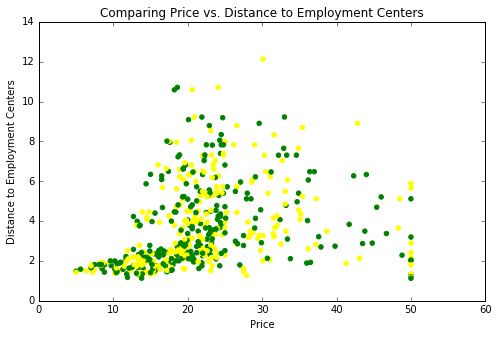

In [36]:
plt.figure(figsize=(8,5))
plt.scatter(bos.PRICE, bos.DIS, color=['green', 'yellow'], s=20)

plt.xlabel("Price")
plt.ylabel("Distance to Employment Centers")
plt.title("Comparing Price vs. Distance to Employment Centers")

In [37]:
bos[['DIS', 'NOX']].corr()

,DIS,NOX
DIS,1.00000,-0.76923
NOX,-0.76923,1.00000


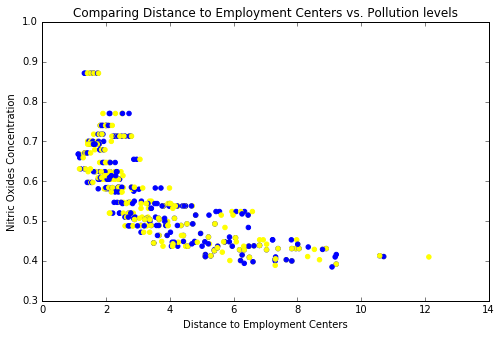

In [38]:
plt.figure(figsize=(8,5))
plt.scatter(bos.DIS, bos.NOX, color=['blue', 'yellow'], s=20)

plt.xlabel("Distance to Employment Centers")
plt.ylabel("Nitric Oxides Concentration")
plt.title("Comparing Distance to Employment Centers vs. Pollution levels")

Very high negative correlation. Amazing to see that the closer to the Employment Centers, the increase in pollution. As you move further away, the amount of pollution decreases.
<br><br>

***RAD:*** index of accessibility to radial highways

In [39]:
bos['RAD'].value_counts()

24    132
5     115
4     110
3      38
6      26
8      24
2      24
1      20
7      17
Name: RAD, dtype: int64

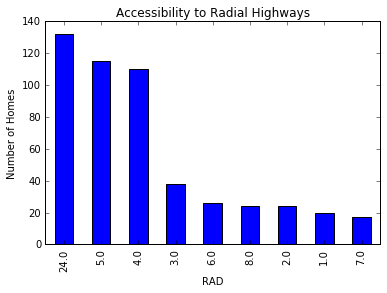

In [40]:
bos['RAD'].value_counts().plot(kind='bar')

plt.title("Accessibility to Radial Highways")

plt.xlabel("RAD")
plt.ylabel("Number of Homes")

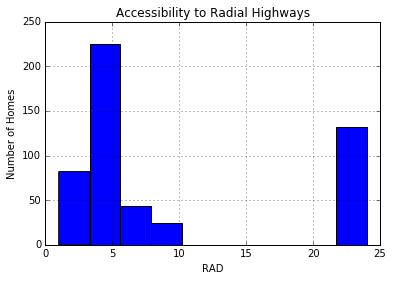

In [41]:
bos['RAD'].hist()

plt.title("Accessibility to Radial Highways")

plt.xlabel("RAD")
plt.ylabel("Number of Homes")

***TAX:*** full-value property-tax rate per $10,000

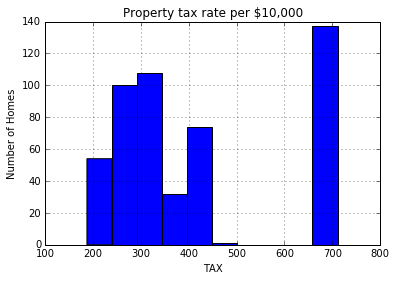

In [42]:
bos['TAX'].hist()

plt.title("Property tax rate per $10,000")

plt.xlabel("TAX")
plt.ylabel("Number of Homes")

***PTRATIO:*** pupil-teacher ratio by town

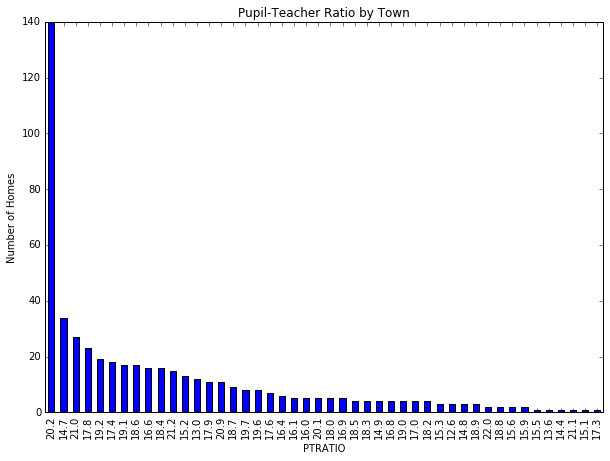

In [43]:
bos['PTRATIO'].value_counts().plot(kind='bar', figsize=(10,7))

plt.title("Pupil-Teacher Ratio by Town")

plt.xlabel("PTRATIO")
plt.ylabel("Number of Homes")

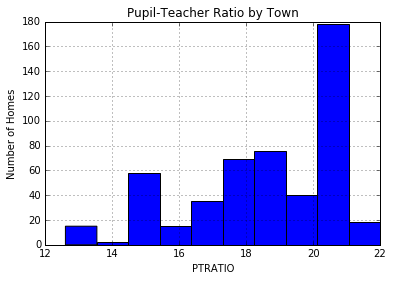

In [44]:
bos['PTRATIO'].hist()

plt.title("Pupil-Teacher Ratio by Town")

plt.xlabel("PTRATIO")
plt.ylabel("Number of Homes")

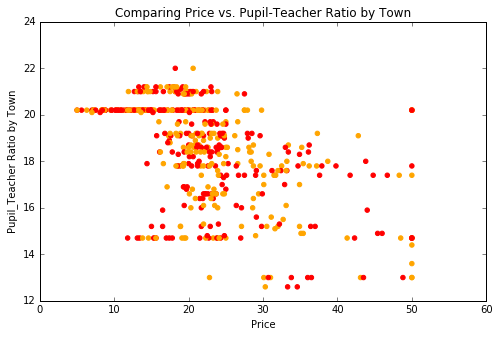

In [45]:
plt.figure(figsize=(8,5))
plt.scatter(bos.PRICE, bos.PTRATIO, color=['red', 'orange'], s=20)

plt.xlabel("Price")
plt.ylabel("Pupil_Teacher Ratio by Town")
plt.title("Comparing Price vs. Pupil-Teacher Ratio by Town")

Negative correlation: as the price increases, the number of students per teacher in the classroom decreases

<br>***B:*** 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

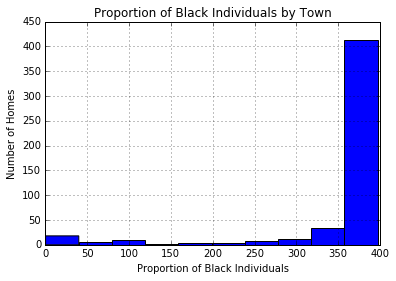

In [46]:
bos['B'].hist()

plt.title("Proportion of Black Individuals by Town")

plt.xlabel("Proportion of Black Individuals")
plt.ylabel("Number of Homes")

***LSTAT:*** % lower status of the population

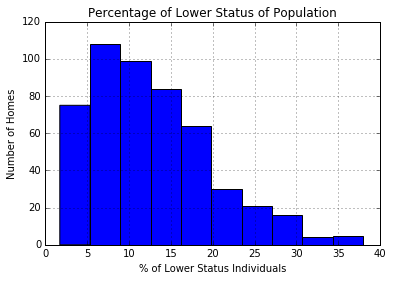

In [47]:
bos['LSTAT'].hist()

plt.title("Percentage of Lower Status of Population")

plt.xlabel("% of Lower Status Individuals")
plt.ylabel("Number of Homes")

***PRICE:*** Median value of owner-occupied homes in $1000's

In [48]:
bos['PRICE'].value_counts().head()

50.0    16
25.0     8
21.7     7
22.0     7
23.1     7
Name: PRICE, dtype: int64

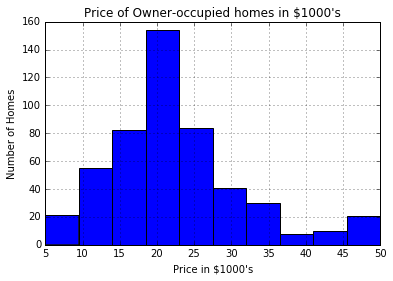

In [49]:
bos['PRICE'].hist()

plt.title("Price of Owner-occupied homes in $1000's")

plt.xlabel("Price in $1000's")
plt.ylabel("Number of Homes")

<br><br>***Data Modelling***
<br><br> ***Model 1: All ***Features are used<br><br>
<br><br> ***Logistic Regression***

In [50]:
X = bs.data
y = bs.target

X.shape, y.shape

((506, 13), (506,))

In [51]:
lr = LinearRegression()
lr.fit(X, y)

print('R^2 = ', lr.score(X, y))

R^2 =  0.740607742865


In [52]:
print('Intercept value: ', lr.intercept_)

#print(X[0], y[0])
print('Predicted price of first X:  ', lr.predict(X[0]))
print('Actual price of first X: ', y[0])

#print('Manual Model: ', np.sum(X[0] * lr.coef_) + lr.intercept_)
#The manual model shows the formula of how we are deriving our predicted price

Intercept value:  36.4911032804
Predicted price of first X:   [ 30.00821269]
Actual price of first X:  24.0


In [53]:
#print(pd.Series(lr.coef_, index=bs.feature_names))
pd.DataFrame(list(zip(bs.feature_names, lr.coef_)), columns = ['Features', 'Estimated Coefficients'])

,Features,Estimated Coefficients
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


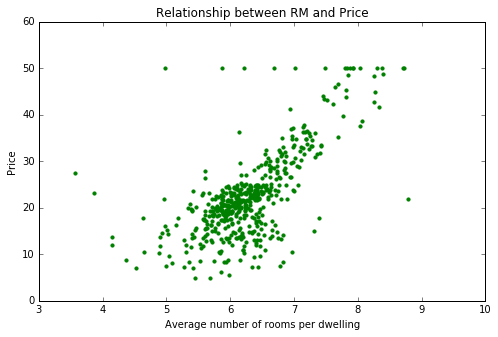

In [54]:
plt.figure(figsize=(8,5))
plt.scatter(bos.RM, bos.PRICE, color='green', s=10)
plt.xlabel("Average number of rooms per dwelling")
plt.ylabel("Price")
plt.title("Relationship between RM and Price")
plt.show()

Positive Correlation between the number of rooms and the price of the house.

In [55]:
bos[['RM', 'PRICE']].corr()

,RM,PRICE
RM,1.00000,0.69536
PRICE,0.69536,1.00000


In [56]:
lr.predict(X)[0:5]

array([ 30.00821269,  25.0298606 ,  30.5702317 ,  28.60814055,  27.94288232])

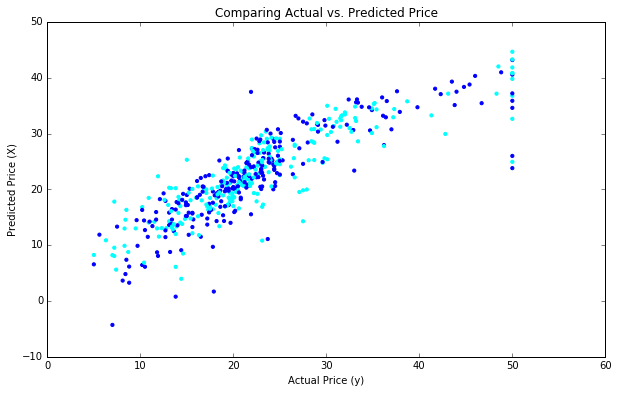

In [57]:
plt.figure(figsize=(10,6))
plt.scatter(bos.PRICE, lr.predict(X), color=['blue', 'aqua'], s=10)

plt.xlabel("Actual Price (y)")
plt.ylabel("Predicted Price (X)")
plt.title("Comparing Actual vs. Predicted Price")

Note: As the actual housing prices increase, we come to see some errors in the predicted price.

In [58]:
mse = np.mean((bos.PRICE - lr.predict(X)) ** 2)
mse

21.89777921768749

If we were to use fewer features, our error would be higher.

In [59]:
#Train Test Split

X_train, X_test, y_train, y_test = sklearn.cross_validation.train_test_split(X, y, test_size=0.33, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(339, 13)
(167, 13)
(339,)
(167,)


In [60]:
lr = LinearRegression()
lr.fit(X_train, y_train)
pred_train = lr.predict(X_train)
pred_test = lr.predict(X_test)

In [61]:
mse_train = np.mean((y_train - pred_train) ** 2)
mse_train

19.546758473534666

In [62]:
mse_test = np.mean((y_test - pred_test) ** 2)
mse_test

28.541367275618477

Visualizing the error

(0, 100)

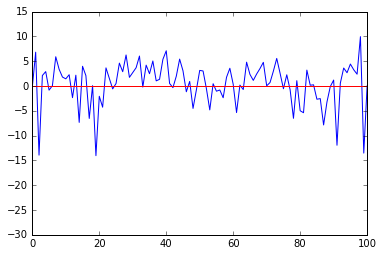

In [63]:
plt.plot(np.arange(len(y_train)), pred_train - y_train)
plt.plot(np.arange(len(y_train)), np.zeros(len(y_train)), color='r')
plt.xlim(0, 100)

(0, 100)

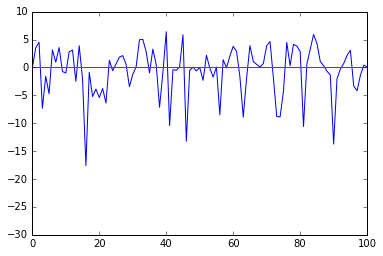

In [64]:
plt.plot(np.arange(len(y_test)), pred_test - y_test)
plt.plot(np.arange(len(y_test)), np.zeros(len(y_test)), color='r')
plt.xlim(0, 100)

(0, 100)

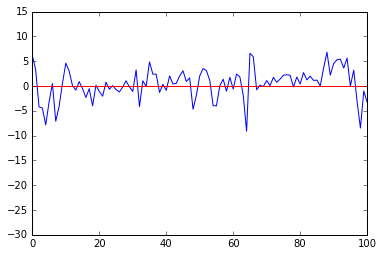

In [65]:
y_pred = lr.predict(X)
plt.plot(np.arange(len(y)), y_pred - y)
plt.plot(np.arange(len(y)), np.zeros(len(y)), color='r')
plt.xlim(0, 100)

Plot of the residuals for the train and test datasets

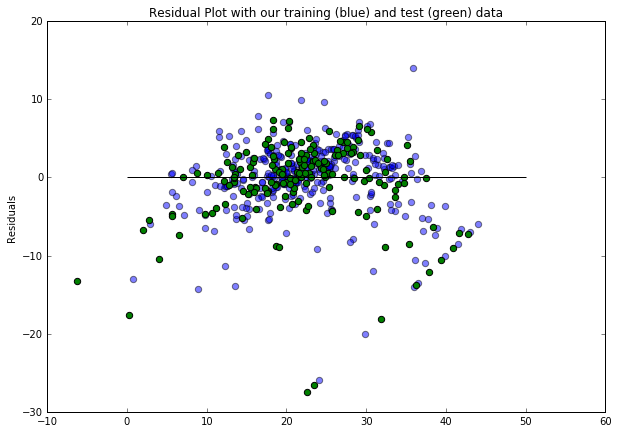

In [66]:
plt.figure(figsize=(10,7))
plt.scatter(pred_train, pred_train - y_train, c='b', s=40, alpha=0.5)
plt.scatter(pred_test, pred_test - y_test, c='g', s=40)
plt.hlines(y=0, xmin=0, xmax=50)
plt.title("Residual Plot with our training (blue) and test (green) data")
plt.ylabel("Residuals")

In [67]:
lm = smf.ols(data = bos, formula='PRICE ~ CRIM + ZN + INDUS + \
             CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT')

lm = lm.fit()
lm.params

Intercept    36.491103
CRIM         -0.107171
ZN            0.046395
INDUS         0.020860
CHAS          2.688561
NOX         -17.795759
RM            3.804752
AGE           0.000751
DIS          -1.475759
RAD           0.305655
TAX          -0.012329
PTRATIO      -0.953464
B             0.009393
LSTAT        -0.525467
dtype: float64

In [68]:
# ols = Ordinary Least Squares
lm = smf.ols(data=bos, formula='np.log(PRICE) ~ np.log(CRIM) + ZN + \
    CHAS + NOX + RM + DIS + RAD + TAX + PTRATIO + B + LSTAT').fit_regularized(alpha=0.001)

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(PRICE)   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     138.5
Date:                Wed, 27 Jul 2016   Prob (F-statistic):          3.81e-143
Time:                        17:31:24   Log-Likelihood:                 91.203
No. Observations:                 506   AIC:                            -158.4
Df Residuals:                     494   BIC:                            -107.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept        3.1611      0.222     14.230      0.000         2.725     3.598
np.log(CRIM)    -0.0184      0.012     -1.596      0.111        -0.041     0.004
ZN               0.0006      0.001      1.079      0.281        -0.001     0.002
CHAS             0.1000      0.037      2.715      0.007         0.028     0.172
NOX             -0.0516      0.160     -0.322      0.748        -0.367     0.264
RM               0.1247      0.018      7.109      0.000         0.090     0.159
DIS             -0.0302      0.008     -3.779      0.000        -0.046    -0.015
RAD              0.0083      0.003      2.720      0.007         0.002     0.014
TAX             -0.0006      0.000     -3.818      0.000        -0.001    -0.000
PTRATIO         -0.0260      0.006     -4.645      0.000        -0.037    -0.015
B                0.0006      0.000      5.053      0.000         0.000     0.001
LSTAT           -0.0298      0.002    -14.501      0.000        -0.034    -0.026
==============================================================================
Omnibus:                       66.456   Durbin-Watson:                   0.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              470.030
Skew:                           0.272   Prob(JB):                    8.60e-103
Kurtosis:                       7.690   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [69]:
lm.params

Intercept       3.161134
np.log(CRIM)   -0.018422
ZN              0.000647
CHAS            0.100001
NOX            -0.051619
RM              0.124682
DIS            -0.030216
RAD             0.008322
TAX            -0.000556
PTRATIO        -0.025977
B               0.000583
LSTAT          -0.029849
dtype: float64

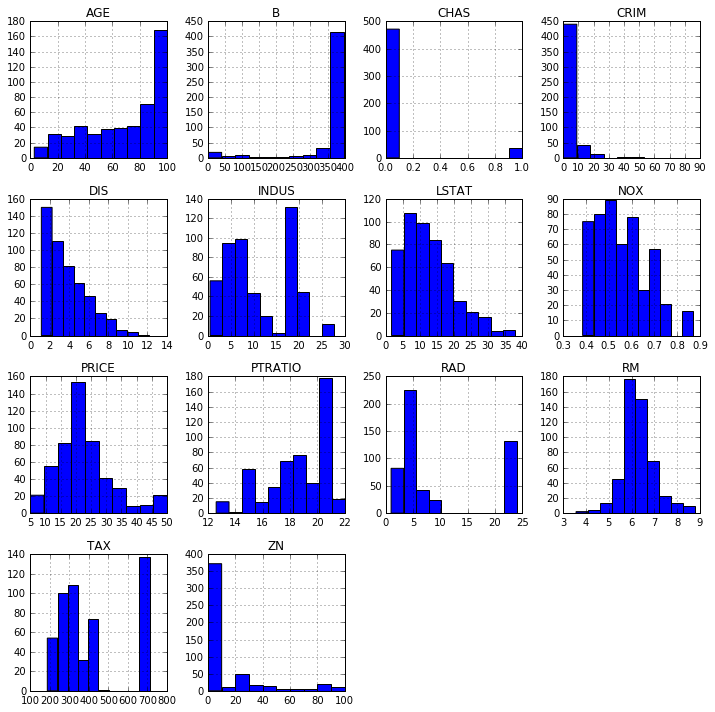

In [70]:
bos.hist(figsize=(12,12));

(array([   3.,    8.,   13.,   23.,   63.,  100.,  172.,   52.,   40.,   32.]),
 array([ 1.60943791,  1.83969642,  2.06995493,  2.30021344,  2.53047195,
         2.76073046,  2.99098897,  3.22124748,  3.45150599,  3.6817645 ,
         3.91202301]),
 <a list of 10 Patch objects>)

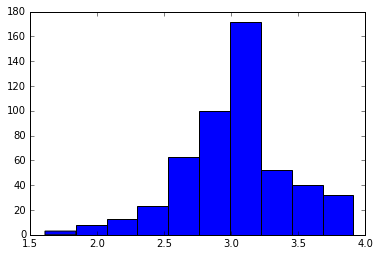

In [71]:
plt.hist(np.log(bos['PRICE']))

(array([  12.,   45.,  109.,   94.,   59.,   38.,   44.,   65.,   32.,    8.]),
 array([-5.06403607, -4.10879557, -3.15355507, -2.19831457, -1.24307408,
        -0.28783358,  0.66740692,  1.62264742,  2.57788792,  3.53312842,
         4.48836892]),
 <a list of 10 Patch objects>)

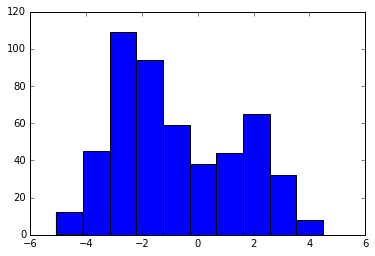

In [72]:
plt.hist(np.log(bos['CRIM']))

<br><br>***Results:***
<br><br>
House prices are higher in areas (with):
- Decrease in crime rates
- Decrease in pupil-teacher ratio
- Closer to the Charles River
- Increase in number of rooms
- Decrease in nitrogen oxide levels

Very interesting to see the higher nitrogen oxide levels as you move closer to the Employment Centers.  Such a high negative correlation between the two features (NOX and DIS).  When looking at the relationship between price and distance to employment centers, that has a smaller correlation than the relationship between price and nitrogen oxide levels, meaning that pollution in this area has more of an importance than living close to work, when looking for a home.